# CRISP DM

In [ ]:
Bussines Understanding

- Problem
Perusahaan Dream Housing Finance menangani semua jenis pinjaman rumah. Mereka memiliki kehadiran
di semua daerah perkotaan, semi perkotaan dan pedesaan. Pelanggan pertama-tama mengajukan pinjaman
rumah dan setelah itu perusahaan memvalidasi kelayakan pelanggan untuk pinjaman. Dari ajuan yang
diberikan pelanggan kepada perusahaan, nantinya pelanggan akan mengetahui secara otomatis apakah
ajuannya diterima atau tidak.

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan)
bertujuan untuk menganalisis dan mengotomatiskan proses kelayakan pinjaman berdasarkan detail
pelanggan yang diberikan saat mengisi formulir aplikasi online. Untuk mengotomatiskan proses
ini, mereka telah menyediakan dataset untuk mengidentifikasi segmen pelanggan yang memenuhi syarat
untuk jumlah pinjaman sehingga mereka dapat secara khusus menargetkan pelanggan tersebut.

In [ ]:
Data Understanding

Loan_ID             : id peminjaman
Gender              : jenis kelamin
Married             : status pernikahan
Dependents          : jumlah tanggungan peminjam
Education           : pendidikan peminjam apakah sarjana atau bukan sarjana
Self_Employed       : apakah peminjam wiraswasta atau bukan
ApplicantIncome     : pendapatan peminjam
CoapplicantIncome   : pendapatan peminjam bersama
LoanAmount          : jumlah pinjaman dalam ribuan
Loan_Amount_Term    : tempo pinjaman dalam beberapa bulan
Credit_History      : apakah pernah melakukan pinjaman atau tidak
Property_Area       : area properti yang diajukan apakah di kota, semi-kota, atau di desa
Loan_Status         : apakah peminjamannya di approved atau tidak

# Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Loan_Data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# memisahkan independen dengan dependen

independen = [col for col in df.columns != 'Loan_Status']
defenden = 'Loan_Status'

In [6]:
# memisahkan numerik dan kategori
numerik = []
kategori = []

for col in df.columns:
    if df[col].dtype == 'int64':
        numerik.append(col)
    elif df[col].dtype == 'float64':
        numerik.append(col)
    else:
        kategori.append(col)

for col in df.columns:
    if col in numerik:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [7]:
numerik

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [8]:
kategori

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in kategori:
    df[col] = le.fit_transform(df[col])

In [13]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [15]:
df.to_csv('loan.csv')

# Data Preparation

### Split data

In [16]:
# memilih kolom yang akan dijadikan fitur dan memisahkan kolom yang akan dijadikan target
X = df.drop(columns=['Loan_ID', 'Gender', 'Married', 'Loan_Status'], axis=1)
Y = df['Loan_Status']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [18]:
print(X.shape, x_train.shape, x_test.shape)

(614, 9) (491, 9) (123, 9)


# Modeling

### Membuat model training

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

treee = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

In [20]:
model = treee.fit(x_train, y_train)

# Evaluation

### Evaluasi model

In [21]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [22]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.8289205702647657


In [23]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [24]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.7723577235772358


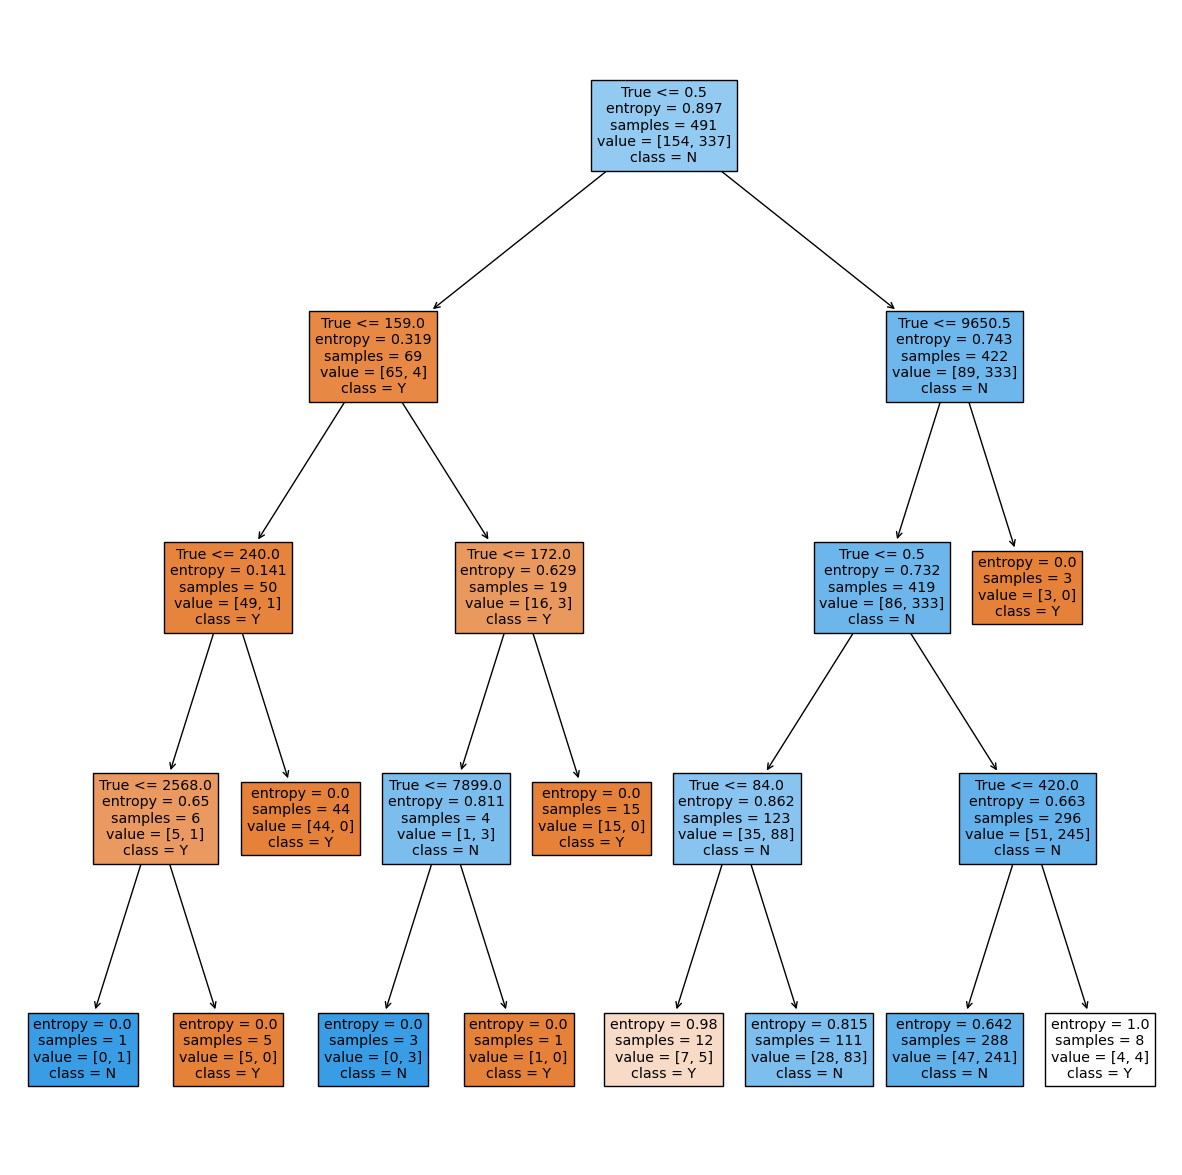

In [25]:
fig = plt.figure(figsize=(15, 15))
_ = tree.plot_tree(
    model,
    feature_names = independen,
    class_names = ['Y', 'N'],
    filled = True)

# Model Prediksi

In [30]:
input_data = (3,0,0,3036,2504.0,158.0,360.0,0.0,1)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi = model.predict(data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
    print('Peminjaman yang diajukan tidak diterima')
else:
    print('Peminjaman yang diajukan diterima')

[0]
Peminjaman yang diajukan tidak diterima


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Deployment

### Save Model

In [31]:
import pickle

filename = 'peminjaman.sav'
pickle.dump(model, open(filename, 'wb'))